# Loading the Dataset

In [2]:
# Installing necessary libraries before loading the dataset
# Used for data manipulation, visualization, and analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

website = pd.read_csv("website_dataset.csv")
print("File loaded successfully")

File loaded successfully


## Understanding the data

In [5]:
# Check the number of rows and columns in the dataset
print(website.shape)  # Output: (rows, columns)

(2000, 7)


## Data Cleaning and Preparation

Raw data often contains inconsistencies, errors, and missing values. This phase involved **data cleansing**, including handling missing data and correcting inconsistencies to ensure accuracy and reliability for analysis.  

The following Python code was used to explore the dataset and gain an initial understanding of the data:

In [9]:
# Displays the first five rows of the dataset to get an overview of its structure
website.head()

# Gives a summary of the dataset, including column names, data types, and missing values
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


The dataset consists of **2,000 rows** and **7 columns**, each representing different website metrics.  

- **Numerical Columns:** Page Views, Session Duration, Bounce Rate, Time on Page, Previous Visits, and Conversion Rate. These can be analyzed statistically.  
- **Categorical Column:** Traffic Source, which indicates different sources of website traffic (e.g., direct, social, referral).  
- **Missing Values:** There are no missing values, as all columns have 2,000 non-null entries.  

This confirms that the dataset is complete and ready for further analysis.

## Data Exploration

In [11]:
# Generate summary statistics for numerical columns to understand distribution, central tendency, and variability
website.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


- **Page Views:**  
  - *Range:* 0 to 14  
  - *Median:* 5  
  - *Observation:* The maximum value of 14 is significantly higher than the median, suggesting that there may be a few instances with unusually high page views.

- **Session Duration:**  
  - *Range:* 0.0036 to 20.29 seconds  
  - *Median:* ~2 seconds  
  - *Observation:* The maximum value (20.29) is much higher than the 75th percentile (4.20), indicating a long tail that could be caused by outliers.

- **Bounce Rate:**  
  - *Range:* 0.0079 to 0.8449  
  - *Median:* ~0.266  
  - *Observation:* The values appear reasonable, but further visual analysis is needed to confirm the distribution.

- **Time on Page:**  
  - *Range:* 0.0685 to 24.80 seconds  
  - *Median:* ~3.32 seconds  
  - *Observation:* Similar to Session Duration, the high maximum compared to Q3 (5.41) suggests potential outliers.

- **Previous Visits:**  
  - *Range:* 0 to 9  
  - *Median:* 2  
  - *Observation:* The maximum of 9 is noticeably higher than the median, indicating that a small subset of visitors might have many previous visits.

- **Conversion Rate:**  
  - *Statistics:* Q1, Median, and Q3 are all 1, while the mean is 0.982 and the minimum is 0.3437.  
  - *Observation:* Most entries show a perfect conversion rate (1), but a few entries are significantly lower. This inconsistency may signal anomalies or data quality issues in this column.

In [13]:
# Display unique values and their frequencies in the categorical column
website['Traffic Source'].value_counts()



Traffic Source
Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: count, dtype: int64

In [17]:
traffic_counts = website['Traffic Source'].value_counts()
traffic_percent = (traffic_counts / traffic_counts.sum()) * 100

# Combine counts and percentages
traffic_summary = pd.DataFrame({'Count': traffic_counts, 'Percentage': traffic_percent})
print(traffic_summary)


                Count  Percentage
Traffic Source                   
Organic           786       39.30
Paid              428       21.40
Referral          301       15.05
Social            269       13.45
Direct            216       10.80


 - **Organic traffic (786 visits, 39.3%)** is the dominant source, meaning most users arrive via search engines (e.g., Google, Bing).
- **Paid traffic (21.4%)** is also significant, showing a strong reliance on paid advertising.
- **Referral traffic (15.1%)** suggests users are coming from external websites.
- **Social media (13.5%)** plays a moderate role in driving traffic.
- **Direct traffic (10.8%)** is the smallest, meaning fewer users are typing the website URL directly.

In [14]:
# Check for missing or unexpected values
website['Traffic Source'].unique()

array(['Organic', 'Social', 'Paid', 'Direct', 'Referral'], dtype=object)

The array ['Organic', 'Social', 'Paid', 'Direct', 'Referral'] shows that there are five distinct traffic sources in the dataset.

### Visualizing and Analyzing User Behavior

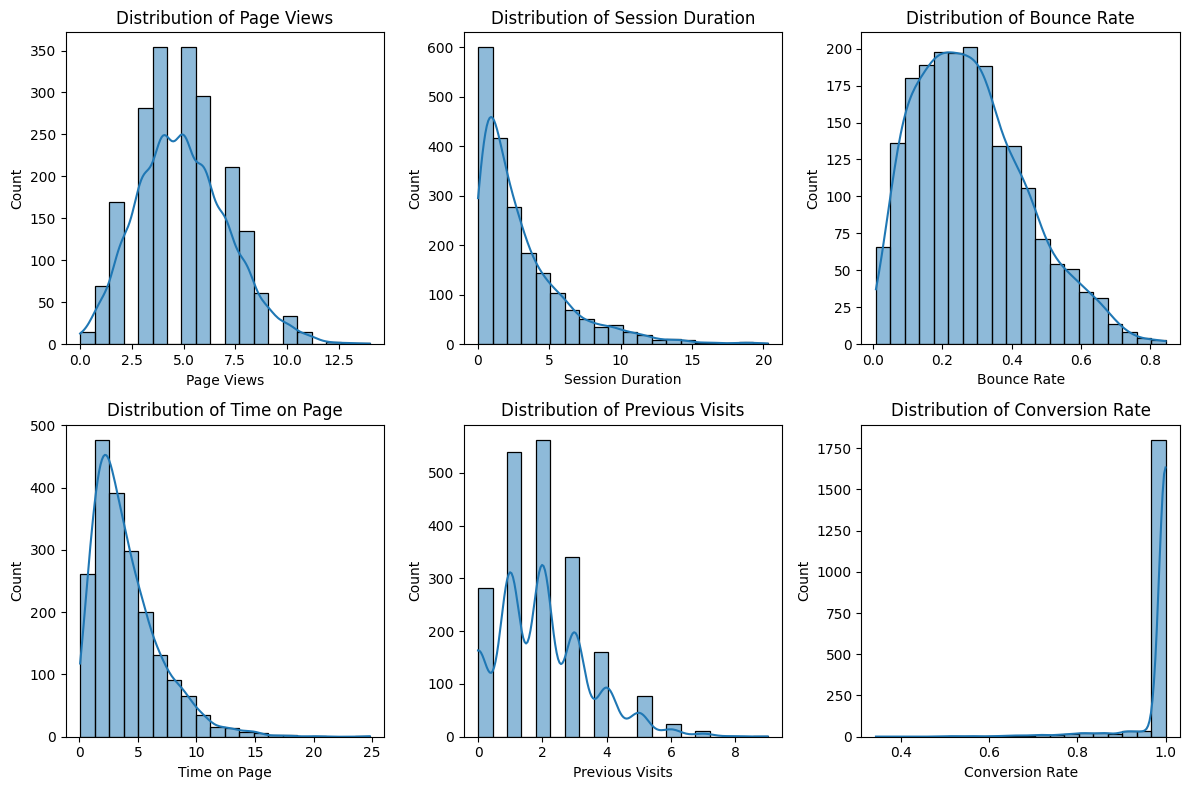

In [18]:
# Plot histograms for numerical columns
numerical_cols = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(website[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

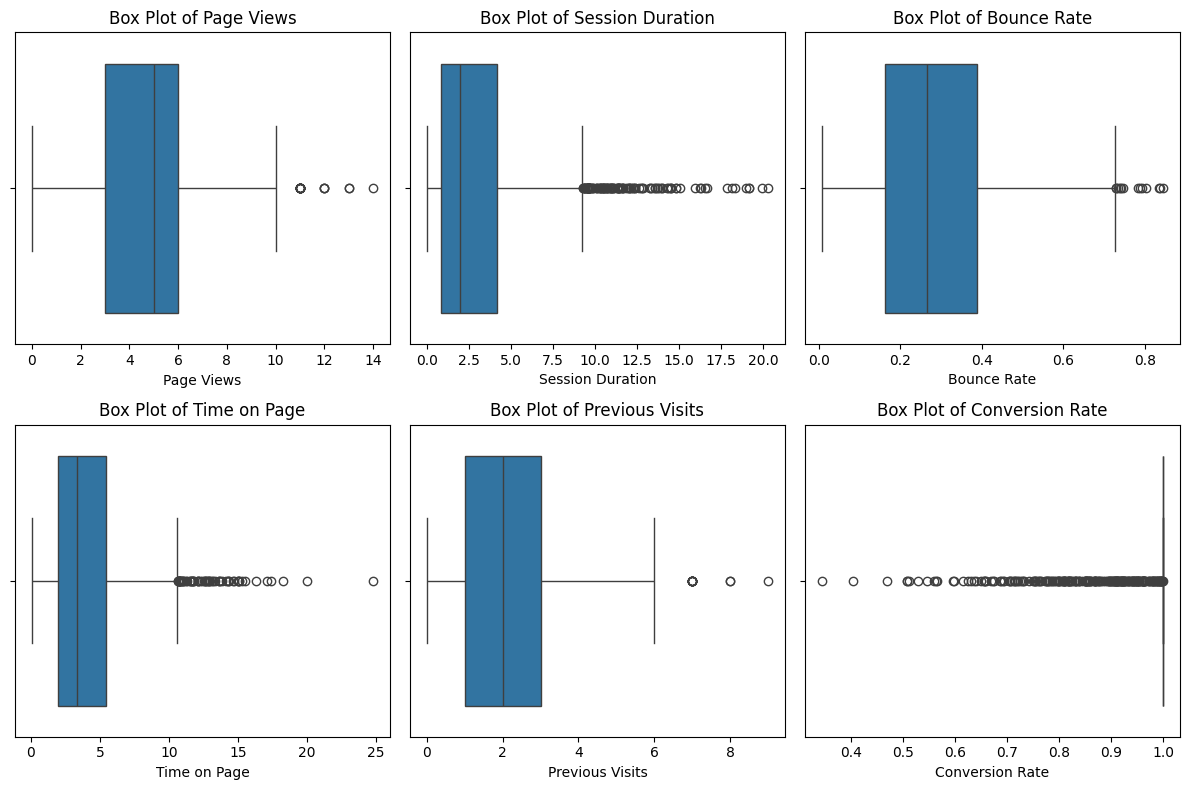

In [19]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=website[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Both visualizations provide insights into the **distribution** and **spread** of the data, but each has its strengths:  

 **1. Page Views**  
- **Histogram:** Shows a right-skewed distribution with most users viewing 3–7 pages.  
- **Box Plot:** Confirms this by showing a **median around 5**, with a few outliers beyond 10.  

 **2. Session Duration**  
- **Histogram:** Right-skewed with most users spending less than 5 minutes, but some outliers exist.  
- **Box Plot:** Highlights the outliers more clearly, showing many sessions above 10 minutes.  

 **3. Bounce Rate**  
- **Histogram:** Appears roughly normal, centered between 20% and 50%.  
- **Box Plot:** Confirms a median bounce rate around 30%-40%, with a few outliers above 80%.  

 **4. Time on Page**  
- **Histogram:** Skewed right, with most users spending under 5 minutes.  
- **Box Plot:** Shows that **outliers exceed 20 minutes**, reinforcing the long tail seen in the histogram.  

 **5. Previous Visits**  
- **Histogram:** Multi-modal, indicating distinct groups (new, returning, frequent visitors).  
- **Box Plot:** Further emphasizes this pattern, with a **median of around 2 visits**, and outliers beyond 8.  

 **6. Conversion Rate**  
- **Histogram:** Skewed right, with most values near **1**.  
- **Box Plot:** Highlights that many users have a high conversion rate, confirming the effectiveness of the funnel.  


 ## Data Visualisation

In [21]:
# Compare key metrics by traffic source (example)
traffic_insights = website.groupby("Traffic Source").agg(
    Avg_Session_Duration=("Session Duration", "mean"),
    Avg_Conversion_Rate=("Conversion Rate", "mean"),
    Bounce_Rate=("Bounce Rate", "mean")
).sort_values(by="Avg_Conversion_Rate", ascending=False)
print(traffic_insights)

                Avg_Session_Duration  Avg_Conversion_Rate  Bounce_Rate
Traffic Source                                                        
Referral                    3.125496             0.987727     0.266305
Social                      3.057273             0.982679     0.296265
Organic                     3.104197             0.982282     0.281821
Paid                        2.942816             0.979009     0.296026
Direct                      2.692060             0.978679     0.284581


 **1. Average Session Duration (Minutes)**  
- **Referral (3.13 mins)** and **Organic (3.10 mins)** have the longest session durations.  
- **Paid traffic (2.94 mins)** and **Direct traffic (2.69 mins)** have the shortest session durations, suggesting that users from these channels leave quicker.  

 **2. Average Conversion Rate**  
- All sources have **high conversion rates** (above 97%), with **Referral traffic (98.77%)** converting the best.  
- **Direct traffic (97.87%)** has the lowest conversion rate, which could indicate that direct visitors are either less engaged or already familiar with the brand and don’t require another conversion.  

 **3. Bounce Rate**  
- **Referral (26.63%)** has the lowest bounce rate, meaning these users are more engaged.  
- **Social (29.63%)** and **Paid (29.60%)** have the highest bounce rates, implying that users from these sources might leave without further interaction.  

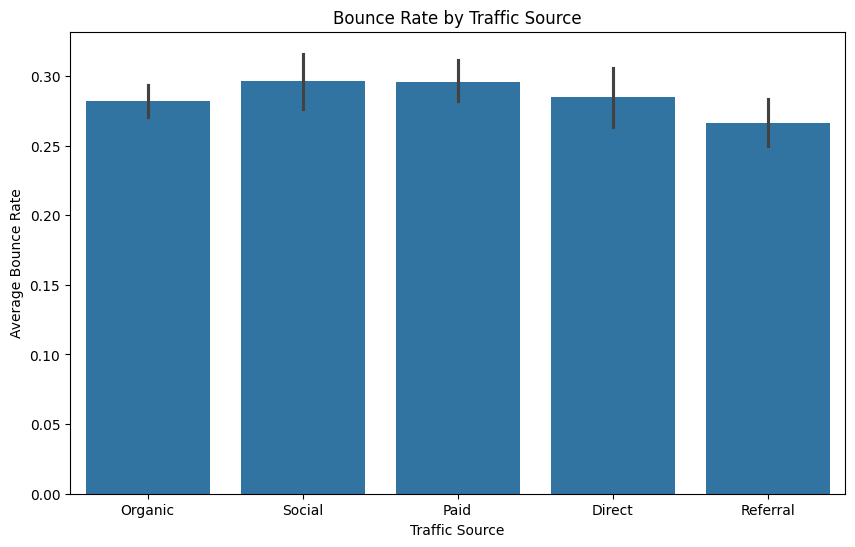

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=website, x="Traffic Source", y="Bounce Rate", estimator="mean")
plt.title("Bounce Rate by Traffic Source")
plt.ylabel("Average Bounce Rate")
plt.show()

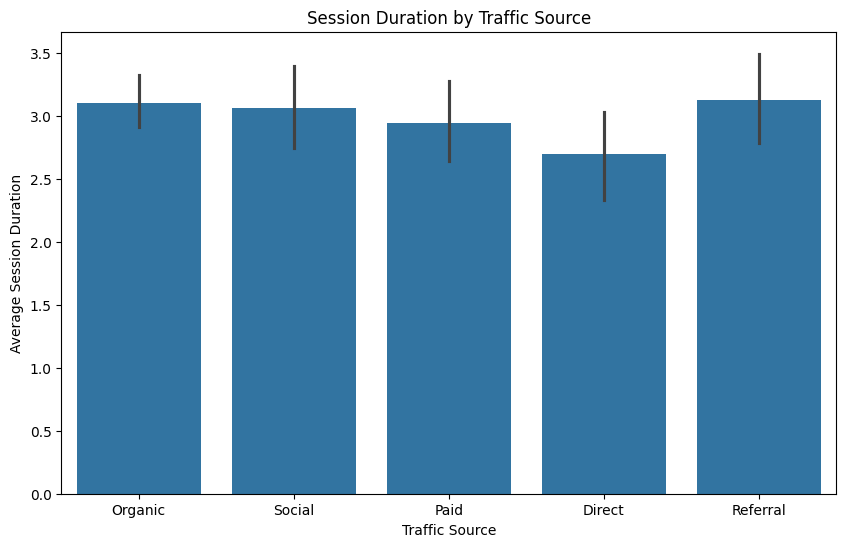

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=website, x="Traffic Source", y="Session Duration", estimator="mean")
plt.title("Session Duration by Traffic Source")
plt.ylabel("Average Session Duration")
plt.show()

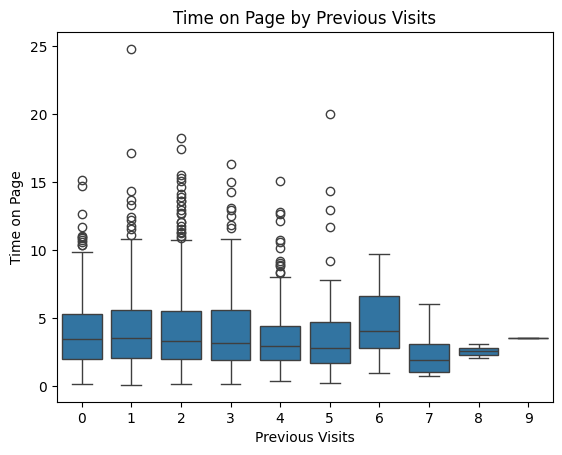

In [28]:
# Time on Page by Previous Visits
sns.boxplot(data=website, x="Previous Visits", y="Time on Page")  
plt.title("Time on Page by Previous Visits")  
plt.show()  

- **First-time visitors** spend the least time on the page, with a lower median and some high outliers.  
- **Visitors with 1–5 previous visits** show higher engagement, spending more time on average.  
- **Frequent visitors (5+ visits)** tend to spend less time, possibly due to familiarity with the content.  
- **Outliers** are present across all categories, indicating that some users stay significantly longer than others.  